In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [3]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

In [4]:
df.shape

(404290, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
205805,205805,309063,309064,Where in Bangalore can you buy activated charc...,"I am looking to buy an apartment in Bangalore,...",0
319253,319253,444671,101031,What universities does Sierra recruit new grad...,What universities does Express recruit new gra...,0
63030,63030,109752,57411,How long can an astronaut survive in space wit...,How long could you survive in space?,1
197717,197717,2219,17226,What are the strongest majors in terms of job ...,What are the strongest majors in terms of job ...,0
172180,172180,193314,265921,Is milk vegetarian or not?,Is there a logical answer for whether milk is ...,1
378335,378335,78784,32295,How will Donald Trump getting elected as the P...,Donald Trump has won the presidency election. ...,1
254923,254923,369740,342628,"I take 5 mg of generic Ambien at midnight, wak...",How do I go back to sleep after waking up?,0
280444,280444,400014,400015,How do I get my long term boyfriend back who n...,My boyfriend doesn't want me to go to a concer...,0
162477,162477,252931,252932,What does mail semen taste like?,How do I write bid in Fiverr?,0
80701,80701,137152,137153,How can I unfollow on Quora?,How can I unfollow someone on Quora?,1


In [6]:
new_df = df.sample(60001, random_state=2 ) # random_state = 2 means every time same sample is used

In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
new_df = new_df.dropna(subset = 'question2')

In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

is_duplicate
0    37937
1    22063
Name: count, dtype: int64
is_duplicate
0    63.228333
1    36.771667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

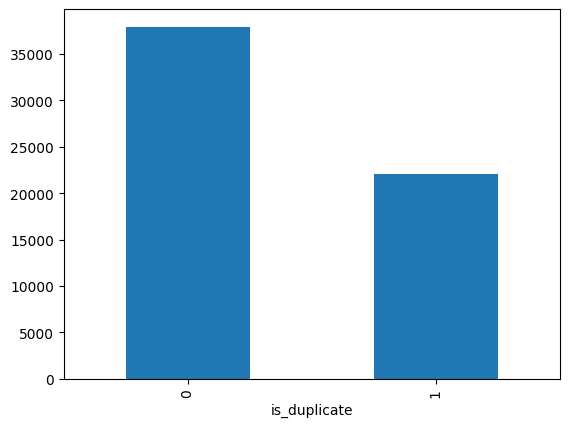

In [10]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 104981
Number of questions getting repeated 9642


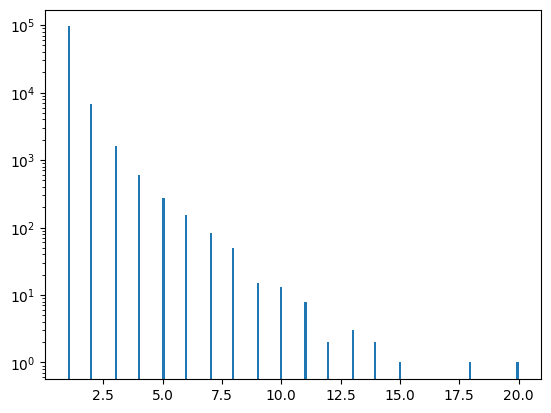

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=200)
plt.yscale('log')
plt.show()

### Feature Engineering


In [13]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [15]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [16]:
print(list((map(lambda word: word.lower().strip(), "I am Avishek Basyal and I am the best \n".split(" ")))))

print(set((map(lambda word: word.lower().strip(), "I am Avishek Basyal and I am the best".split(" "))))) # duplicate words are removed


['i', 'am', 'avishek', 'basyal', 'and', 'i', 'am', 'the', 'best', '']
{'and', 'avishek', 'i', 'basyal', 'am', 'the', 'best'}


In [17]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) # Takes question1, splits by space, strips, lowercases → then converts to a SET (unique words)
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2) # Returns the number of common unique words between question1 and question2


In [18]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [20]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [21]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


### Analysis of the added features

minimum characters 1
maximum characters 391
average num of characters 59


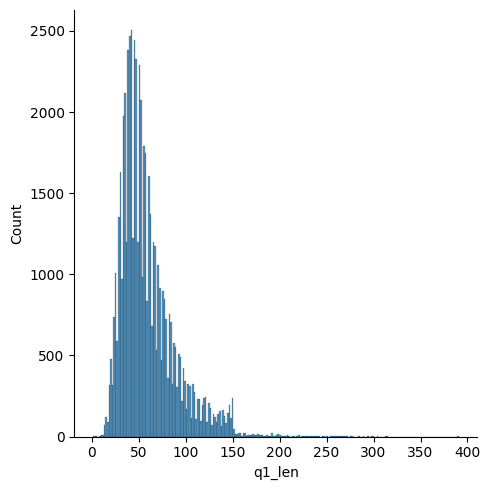

In [22]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


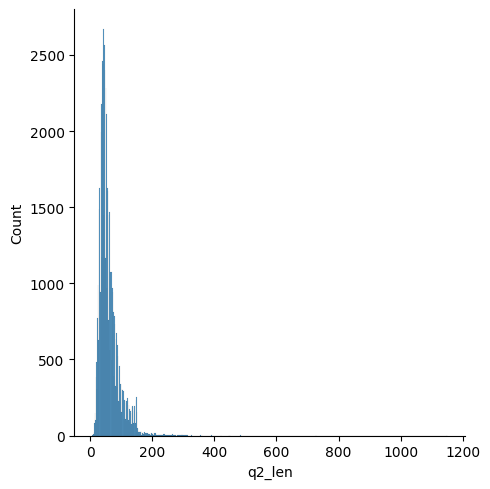

In [23]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


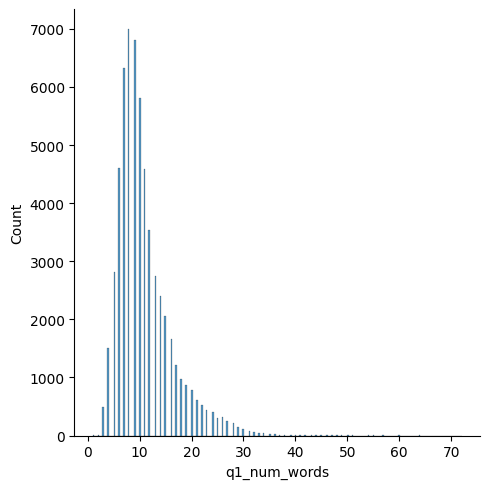

In [24]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


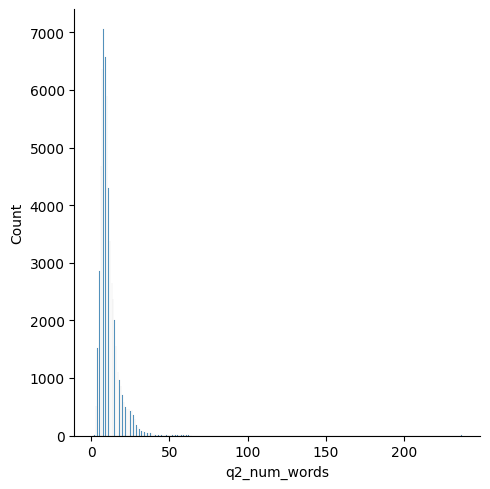

In [25]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

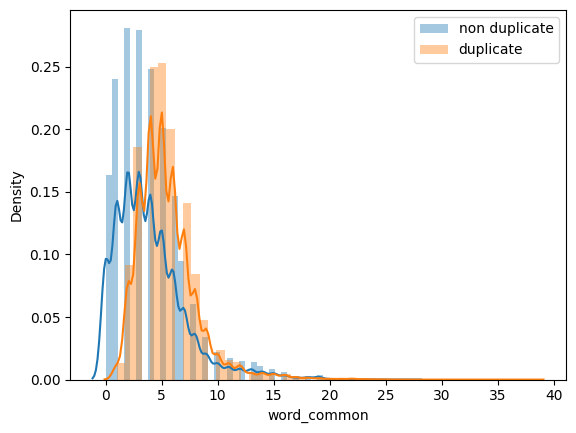

In [26]:
# common words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')

# return a new DataFrame containing only rows where is_duplicate is 0 (non-duplicate pairs).
# From the filtered DataFrame you extract the word_common column . The result is a Pandas Series of numeric values (e.g. 0, 1, 2, 3, ...).
# and the histplot between is_duplicate and no. of common word is shown


sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

###### Here from the above graph we found generally if common word are less than 4 between question 1 and question 2 then probability of being non_duplicate is more and if common word is more than 4 probability of being duplicate is more

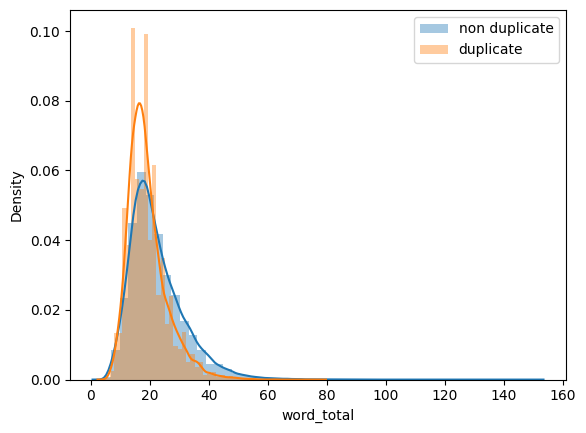

In [27]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

###### if total words are between 0 to 20 then probability of being duplicate is more and if total words are more than 40 probability of being non duplicate is more

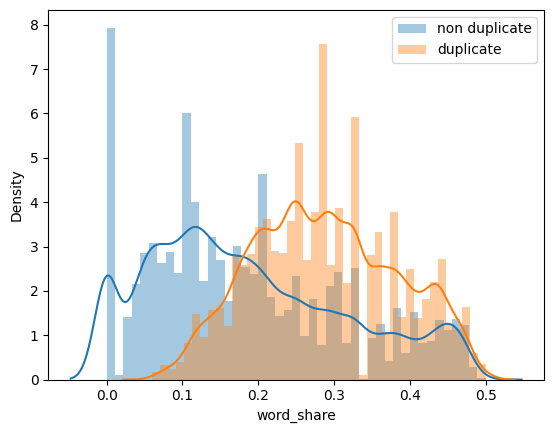

In [28]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

###### if wordshare is less than 0.2 probability of being non-duplicate is more and if greater than 0.2 probability of being duplicate is more

In [29]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [30]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(60000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

# q1_arr and q2_arr contain the Bag-of-Words vectors for question1 and question2, respectively.
# Each row in q1_arr corresponds to one question1 and has 5000 features.
# Each row in q2_arr corresponds to one question2 and has 5000 features.


In [32]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

# q1_arr and q2_arr contain the Bag-of-Words vectors for question1 and question2, respectively.
# Each row in q1_arr corresponds to one question1 and has 5000 features.
# Each row in q2_arr corresponds to one question2 and has 5000 features.
# When concatenated (q1_arr + q2_arr) and combined with 8 handcrafted features, 
# the final_df has shape (60000, 10008).

(60000, 10000)

In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(60000, 10008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.774

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7715833333333333

In [45]:
def check_duplicate(q1, q2, vectorizer, model):
    from scipy.sparse import hstack
    import numpy as np

    # Bag-of-Words vectors (q1 and q2)
    q1_vec = vectorizer.transform([q1])  # shape (1, 5000)
    q2_vec = vectorizer.transform([q2])  # shape (1, 5000)

    #  Handcrafted features
    q1_len = len(q1)
    q2_len = len(q2)
    q1_num_words = len(q1.split())
    q2_num_words = len(q2.split())
    w1 = set(q1.lower().split())
    w2 = set(q2.lower().split())
    word_common = len(w1 & w2)
    word_total = q1_num_words + q2_num_words
    word_share = word_common / word_total if word_total != 0 else 0

    # Arrange handcrafted features in same order as training
    extra_features = np.array([[q1_len, q2_len, q1_num_words, q2_num_words,
                                word_common, word_total, word_share]])

    #  Combine handcrafted features + q1 BoW + q2 BoW in correct order
    X_new = hstack([extra_features, q1_vec, q2_vec])

    #  Predict
    pred = model.predict(X_new)
    return "Duplicate" if pred[0] == 1 else "Not Duplicate"


In [46]:
q1 = "How to learn Python programming?"
q2 = "Tips to learn Python programming"

check_duplicate(q1, q2, cv, rf)

'Duplicate'

In [47]:
q1 = "How to learn Python programming?"
q2 = "Tips to drive car"

check_duplicate(q1, q2, cv, rf)

'Not Duplicate'

In [49]:
q1 = "How to learn Python programming?"
q2 = "Tips to learn swimming"

check_duplicate(q1, q2, cv, rf)

'Not Duplicate'

In [50]:
q1 = "What is the best way to lose weight?"
q2 = "What is the best way to lose weight?"

check_duplicate(q1, q2, cv, rf)

'Duplicate'

In [53]:
q1 = "What is the best way to lose weight?"
q2 = "How can I reduce my body weight effectively?"

check_duplicate(q1, q2, cv, rf)

'Duplicate'

In [52]:
q1 = "What is machine learning?"
q2 = "Explain machine learning in simple terms?"

check_duplicate(q1, q2, cv, rf)

'Not Duplicate'